# ResNet Embeddingsimilarities

In [1]:
import torch
from torchvision.io import read_image
from torchvision.models import resnet50, ResNet50_Weights
# from torchvision.models import resnet152, ResNet152_Weights # uncomment for resnet152
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
model = resnet50(pretrained=True)
# model = resnet152(pretrained=True) # uncomment for resnet152
model.eval()

model = torch.nn.Sequential(*list(model.children())[:-1])
print(model)

weights = ResNet50_Weights.DEFAULT
# weights = ResNet152_Weights.DEFAULT # uncomment for resnet152
preprocess = weights.transforms()

### ResNet 18
<figure>
  <img src="https://www.researchgate.net/profile/Sajid-Iqbal-13/publication/336642248/figure/fig1/AS:839151377203201@1577080687133/Original-ResNet-18-Architecture.png">
  <figcaption>Source: https://www.researchgate.net/figure/Original-ResNet-18-Architecture_fig1_336642248</figcaption>
</figure>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


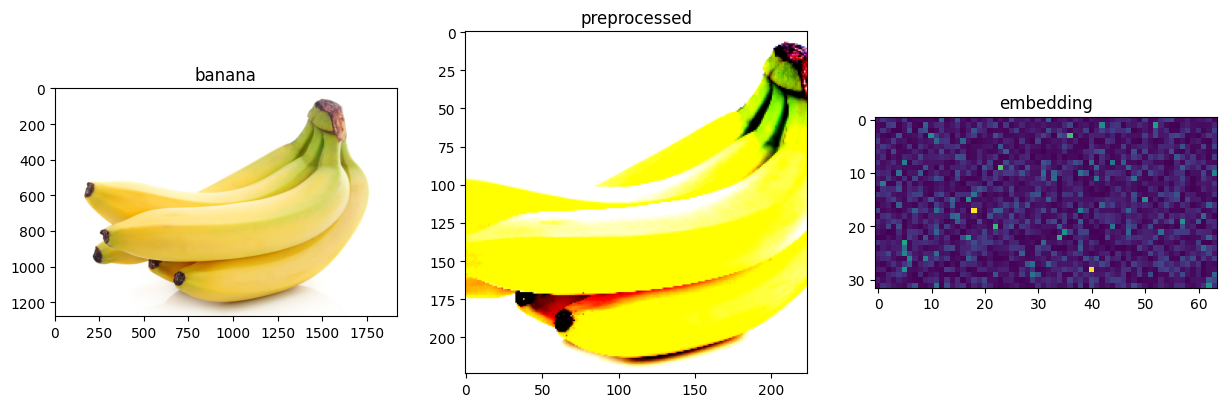

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


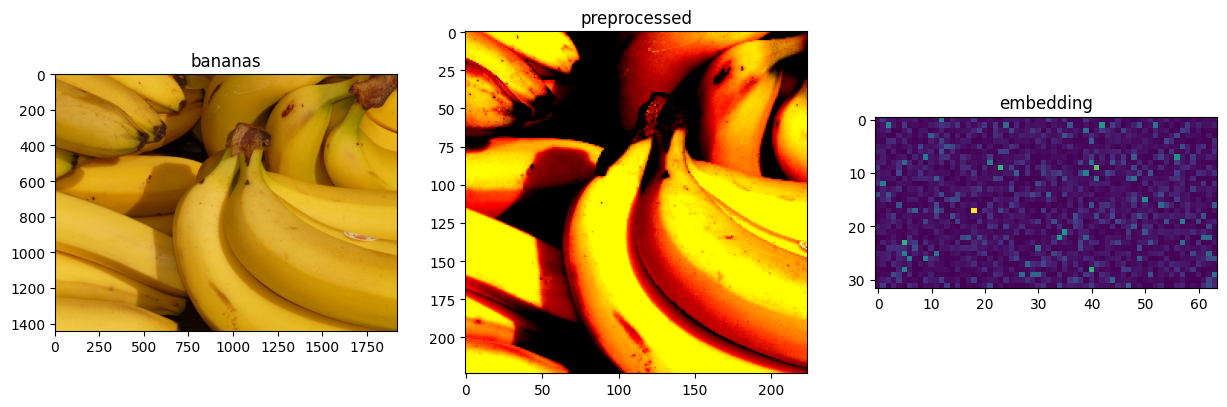

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


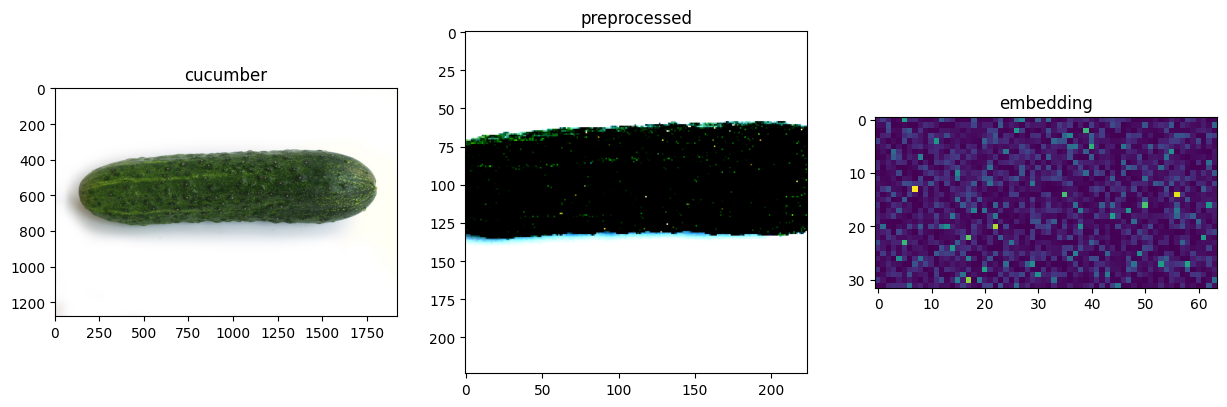

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


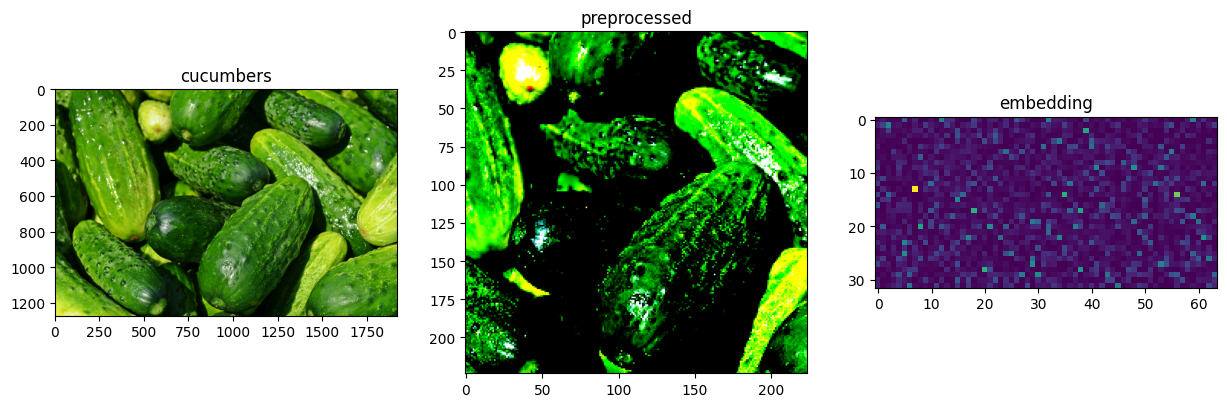

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


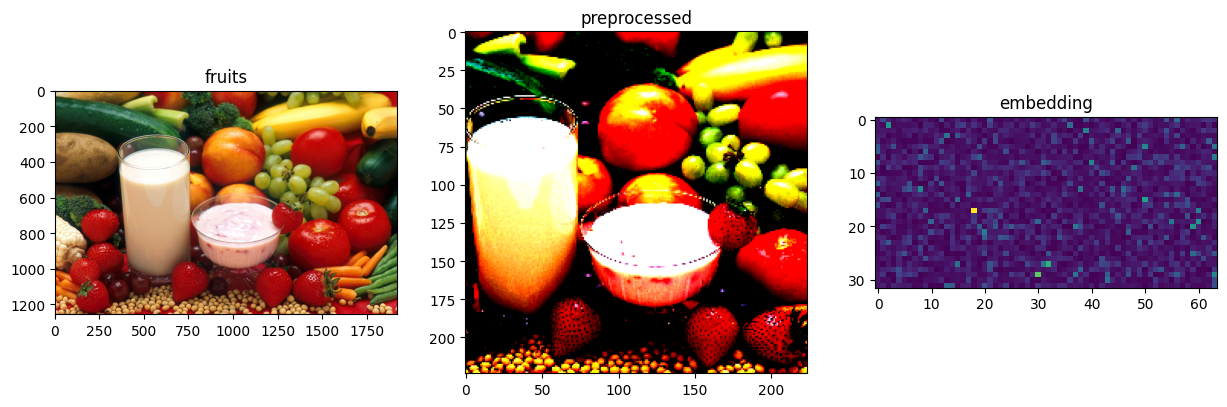

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


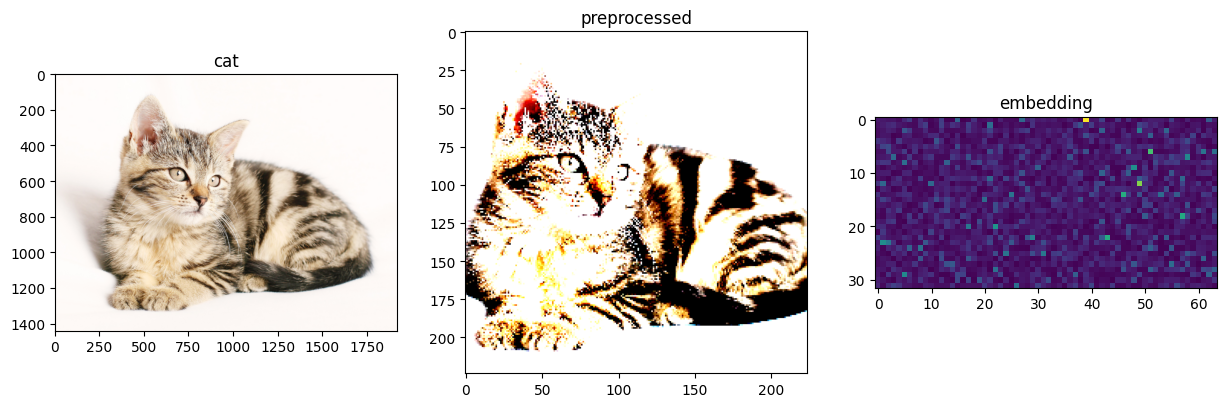

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


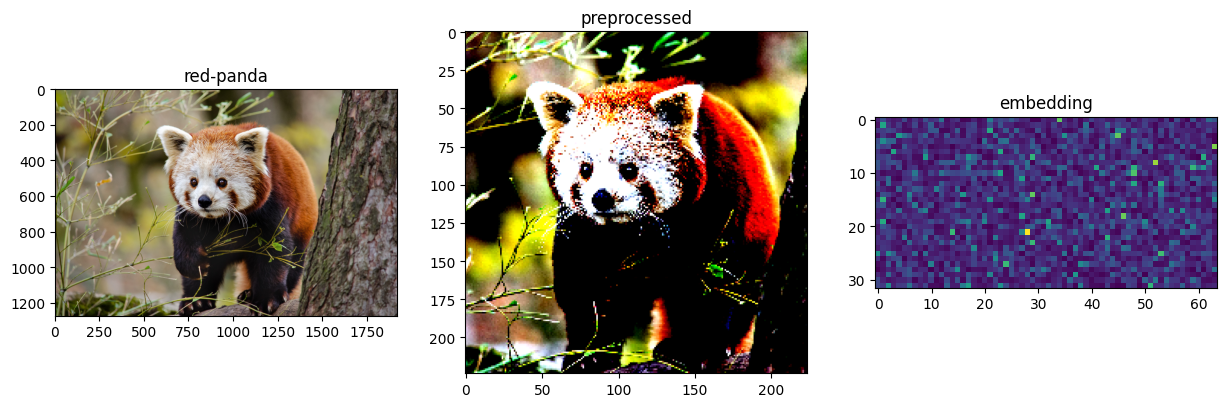

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


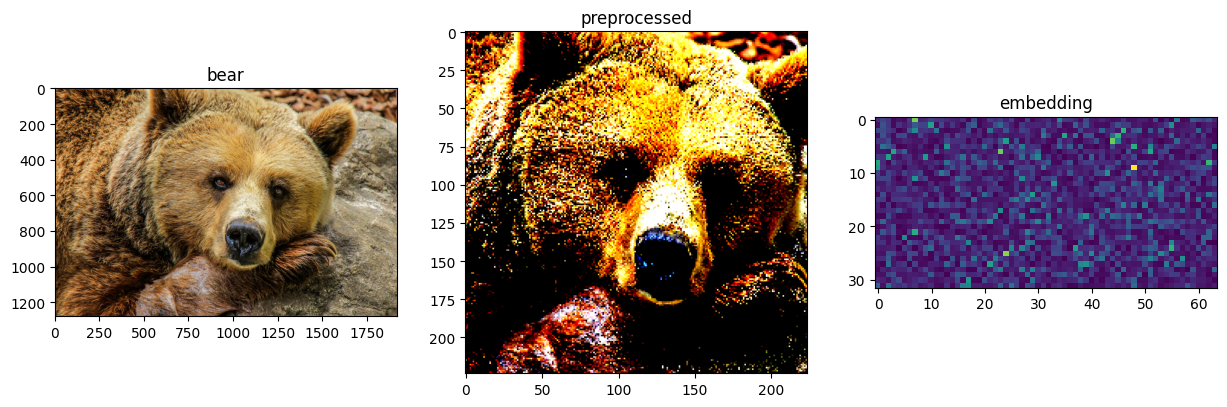

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


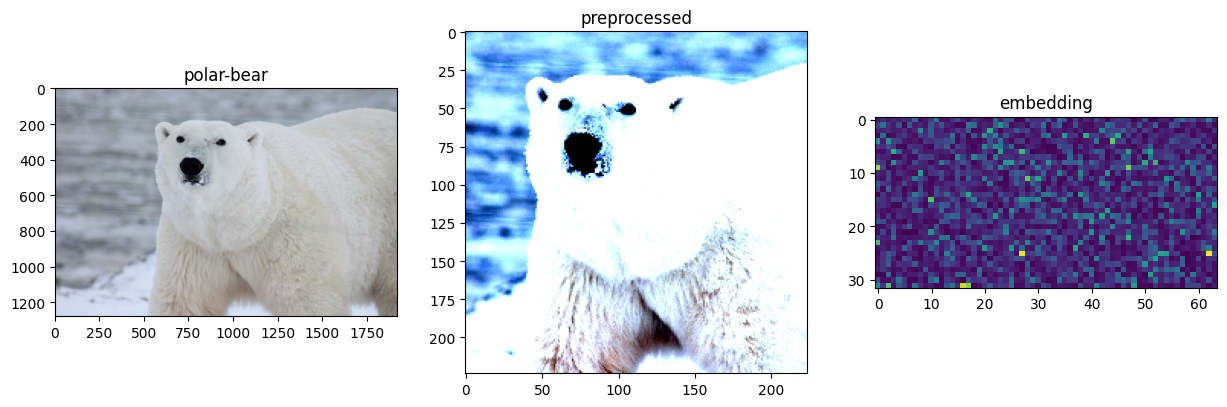

In [3]:
# images from https://pixabay.com/ 
images = ['banana.jpg', 'bananas.jpg', 'cucumber.jpg', 'cucumbers.jpg', 'fruits.jpg', 'cat.jpg', 'red-panda.jpg', 'bear.jpg', 'polar-bear.jpg']
embeddings = {}
for image in images:
    name = image.split('.')[0]  
    original_img = read_image(f'data/{image}')
    preprocess_img = preprocess(original_img)
    img = preprocess_img.unsqueeze(0)
    y = model(img)
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    ax1.imshow(original_img.permute(1, 2, 0))
    ax1.set_title(name)
    ax2.imshow(preprocess_img.permute(1, 2, 0))
    ax2.set_title('preprocessed')
    ax3.imshow(y.detach().numpy().reshape(32, 64))
    ax3.set_title('embedding')
    plt.show()

    embeddings[name] = y.detach()

banana vs bananas: 	 79.45%
banana vs cucumber: 	 57.61%
banana vs cucumbers: 	 52.43%
banana vs fruits: 	 62.94%
banana vs cat: 	 53.13%
banana vs red-panda: 	 52.13%
banana vs bear: 	 51.84%
banana vs polar-bear: 	 59.35%
----------------
cucumber vs banana: 	 57.61%
cucumber vs bananas: 	 49.94%
cucumber vs cucumbers: 	 73.74%
cucumber vs fruits: 	 54.82%
cucumber vs cat: 	 55.03%
cucumber vs red-panda: 	 47.56%
cucumber vs bear: 	 47.29%
cucumber vs polar-bear: 	 48.13%
----------------
red-panda vs banana: 	 52.13%
red-panda vs bananas: 	 48.69%
red-panda vs cucumber: 	 47.56%
red-panda vs cucumbers: 	 47.39%
red-panda vs fruits: 	 59.77%
red-panda vs cat: 	 56.60%
red-panda vs bear: 	 77.55%
red-panda vs polar-bear: 	 67.78%
----------------


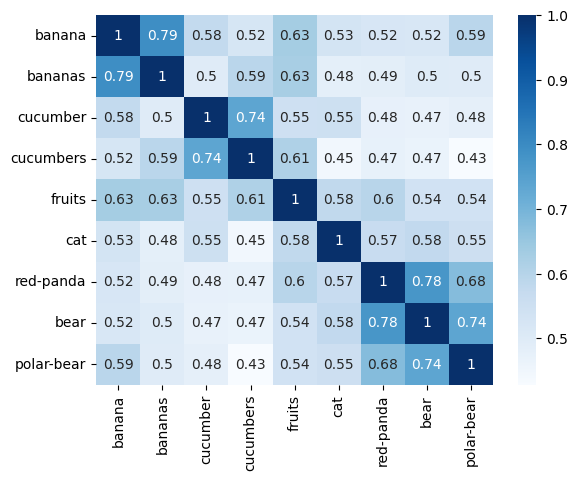

In [4]:
similarities = np.zeros((len(embeddings), len(embeddings)))
for name1 in embeddings:
    for name2 in embeddings:
        similarities[images.index(f'{name1}.jpg'), images.index(f'{name2}.jpg')] = torch.cosine_similarity(embeddings[name1], embeddings[name2], dim=1)

for name1 in ['banana', 'cucumber', 'red-panda']:
    for name2 in embeddings:
        if name1 != name2:
            print(f'{name1} vs {name2}: \t {similarities[images.index(f"{name1}.jpg"), images.index(f"{name2}.jpg")] * 100:.2f}%')
    print('----------------')

df = pd.DataFrame(similarities, index=embeddings.keys(), columns=embeddings.keys())
sns.heatmap(df, annot=True, cmap='Blues')
plt.show()

# We see that the embeddings are very similar for the same object, but not for different objects

# Stable Diffusion and CLIP

### Big Sleep

_Source: [lucidrains/big-sleep](https://github.com/lucidrains/big-sleep)_

Original notebook [![Open In Colab][colab-badge]][colab-notebook]

Simplified notebook [![Open In Colab][colab-badge]][colab-notebook-2]

[colab-notebook]: <https://colab.research.google.com/drive/1NCceX2mbiKOSlAd_o7IU7nA9UskKN5WR?usp=sharing>
[colab-notebook-2]: <https://colab.research.google.com/drive/1MEWKbm-driRNF8PrU7ogS5o3se-ePyPb?usp=sharing>
[colab-badge]: <https://colab.research.google.com/assets/colab-badge.svg>


In [ ]:
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False
print(f"Colab: {IN_COLAB}")

if IN_COLAB:
    !nvidia-smi

!pip install -U big-sleep

In [ ]:
from big_sleep import Imagine

dream = Imagine(
    text = "fire in the sky",
    lr = 5e-2,
    save_every = 25,
    save_progress = True
)

dream()
# Your image should be saved in the Session_06 folder

![](fire_in_the_sky.png)